# Работа с последовательностями событий и классические методы
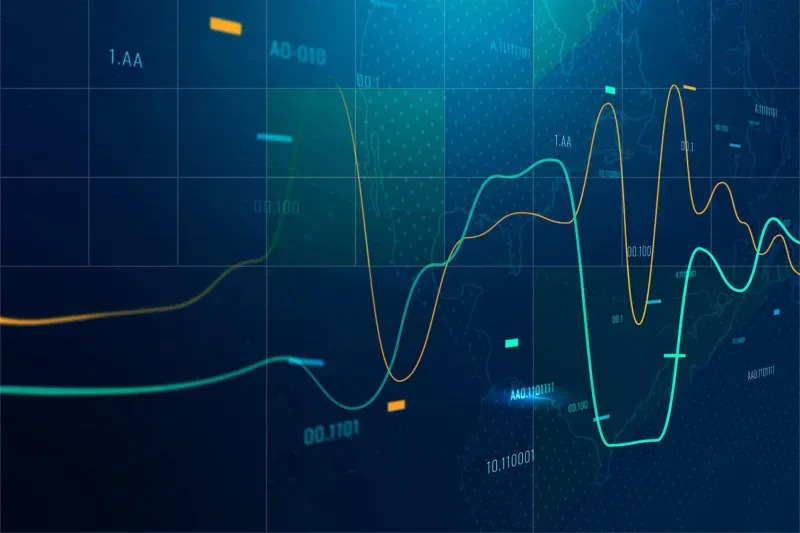

1. Введение: 
   - Описание задачи машинного обучения, связанной с последовательностью событий. 
   - Краткое описание датасета (история транзакций по клиентам банка) и целевой переменной. 
   - Описание признаков транзакций (выборочное, с отсылкой к полной версии). 

# I. Введение
## 1. Описание задачи
Прогнозирование склонности клиента к покупке продукта является важной задачей для многих компаний, помогая:

- оценить потребности клиента, сформировать профиль его продукта;
- улучшать качество рекомендаций, формировать пакетные предложения, формировать индивидуальные условия;
- правильно сформировать стратегию коммуникации с клиентом оценить доход, который клиент может принести компании в будущем, исходя из прибыльности продукции, в которой он заинтересован (Customer Life Value — CLTV).

Для решения подобных задач обычно используются различные данные о клиенте:

    - профиль клиента;
    - история предыдущих покупок и коммуникаций;
    - транзакционная деятельность;
    - геоинформация о местах постоянного или временного проживания;
    - и т. д.;
    
Особое значение имеют данные, характеризующие закономерности поведения клиента (цепочки событий), так как они помогают понять закономерности в действиях клиента, оценить динамику изменения его поведения. Совместное использование поведенческих данных из различных источников помогает более полно описать клиента с точки зрения прогнозирования его потребностей, что, в свою очередь, ставит задачу наиболее эффективного сочетания различных модальностей для повышения производительности и качества разрабатываемой модели.


#### *Цель: спрогнозировать для каждого пользователя принятие/непринятие каждого из четырех продуктов в течение месяца после отчетной даты, исторические данные по ним находятся в целевых показателях(targets).*

## 2. Описание датасета
Сегодня мы воспользуемся [датасетом MBD](https://huggingface.co/datasets/ai-lab/MBD-mini) c историями транзакций клиентов.
Набор данных состоит из обезличенных исторических данных, которые содержат следующую информацию: транзакционная активность (транзакции), встраивания диалогов (диалоги), геоактивность (геострим) для некоторых клиентов Банка за 12 месяцев.
Нас будут интересовать следующие признаки:

```
|-- trx Desc: Transactional activity
    |-- client_id: str Desc: Client id
    |-- event_time: timestamp Desc: Transaction's date
    |-- amount: float Desc: Transaction's amount
    |-- fold: int
    |-- event_type: int Desc: Transaction's type
    |-- event_subtype: int Desc: Clarifying the transaction type
    |-- currency: int Desc: Currency
    |-- src_type11: int Desc: Feature 1 for sender
    |-- src_type12: int Desc: Clarifying feature 1 for sender
    |-- dst_type11: int Desc: Feature 1 for contractor
    |-- dst_type12: int Desc: Clarifying feature 1 for contractor 
    |-- src_type21: int Desc: Feature 2 for sender
    |-- src_type22: int Desc: Clarifying feature 2 for sender
    |-- src_type31: int Desc: Feature 3 for sender
    |-- src_type32: int Desc: Clarifying feature 3 for sender
```

```
|-- targets
    |-- mon: str  Desc: Reporting month
    |-- target_1: int Desc: Mark of product issuance in the first reporting month
    |-- target_2: int Desc: Mark of product issuance in the second reporting month
    |-- target_3: int Desc: Mark of product issuance in the third reporting month
    |-- target_4: int Desc: Mark of product issuance in the fourth reporting month
    |-- trans_count: int Desc: Number of transactions
    |-- diff_trans_date: int Desc: Time difference between transactions
    |-- client_id: str Desc: Client id
```

Это только те признаки, которые мы будем использовать. С полным списком параметров(гео-данные, эмбеднги диалогов) и их описанием Вы можете ознакомиться на странице [датасета](https://huggingface.co/datasets/ai-lab/MBD-mini).


# II. Исследование данных
## 1. Подключение библиотек

#### В работе мы будем использовать следующие библиотеки и модули:

#### Системные библиотеки

- **os** — модуль для работы с операционной системой, включая работу с путями, файлами и переменными окружения.  
  [Документация](https://docs.python.org/3/library/os.html)

- **random** — модуль для генерации случайных чисел и выполнения случайных операций.  
  [Документация](https://docs.python.org/3/library/random.html)

#### Работа с данными

- **pandas** — библиотека для анализа и обработки данных, предоставляет структуры данных, такие как DataFrame и Series.  
  [Документация](https://pandas.pydata.org/pandas-docs/stable/)

- **numpy** — библиотека для выполнения численных вычислений, работа с массивами и функциями линейной алгебры.  
  [Документация](https://numpy.org/doc/stable/)

#### Профилирование данных

- **ydata_profiling** — библиотека для создания подробного отчета о данных (раньше называлась pandas-profiling).  
  [Документация](https://ydata-profiling.ydata.ai/docs/master/)

#### Визуализация

- **matplotlib** — библиотека для создания графиков и визуализации данных.  
  [Документация](https://matplotlib.org/stable/contents.html)

- **seaborn** — библиотека для статистической визуализации, основанная на matplotlib.  
  [Документация](https://seaborn.pydata.org/)

- **matplotlib.markers** — часть matplotlib, отвечающая за маркеры (специальные символы на графиках).  
  [Документация](https://matplotlib.org/stable/api/markers_api.html)

#### Машинное обучение

- **scikit-learn** (sklearn) — библиотека для машинного обучения, предоставляющая широкий набор алгоритмов и инструментов для работы с моделями.  
  [Документация](https://scikit-learn.org/stable/)

  - **train_test_split** — функция для разделения данных на обучающую и тестовую выборки.  
    [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

  - **LogisticRegression** — класс для создания модели логистической регрессии.  
    [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

  - **StandardScaler** — стандартный скейлер для приведения данных к единому масштабу.  
    [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

  - Метрики:
    - **accuracy_score** — функция для оценки точности модели.  
      [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - **precision_score** — функция для оценки точности (precision) классификации.  
      [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
    - **recall_score** — функция для оценки полноты (recall).  
      [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
    - **f1_score** — функция для расчета F1-меры.  
      [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
    - **confusion_matrix** — матрица ошибок для оценки классификации.  
      [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

#### XGBoost

- **xgboost** — библиотека для работы с градиентным бустингом на деревьях решений.  
  [Документация](https://xgboost.readthedocs.io/en/stable/)

  - **plot_importance** — функция для визуализации важности признаков модели.  
    [Документация](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.plot_importance)
  
#### Балансировка классов

- **imbalanced-learn** (imblearn) — библиотека для обработки несбалансированных данных в задачах классификации.  
  [Документация](https://imbalanced-learn.org/stable/)

  - **SMOTE** — техника для увеличения выборки с использованием синтетических данных (oversampling).  
    [Документация](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

  - **RandomUnderSampler** — техника уменьшения выборки путем случайного удаления объектов из классов с избытком данных.  
    [Документация](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)


#### Установка библиотеки ydata_profiling

In [ ]:
!pip install ydata_profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [2]:
import os
import random as rnd

# Загрузка модели из Hugging Face
from huggingface_hub import hf_hub_download

# Работа с данными
import pandas as pd
import numpy as np
pd.set_option('display.float_format', '{:.3f}'.format)

# Профилирование данных
from ydata_profiling import ProfileReport

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.markers as markers

# Модели машинного обучения и метрики
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from sklearn.preprocessing import StandardScaler

# XGBoost и метрики
import xgboost as xgb
from xgboost import plot_importance, plot_tree

# Балансировка классов
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


## 2. Загрузка датасета

Скачиваем файлы с хранилища и распаковываем их 

In [ ]:
hf_hub_download(repo_id="ai-lab/MBD-mini", filename="detail.tar.gz", repo_type="dataset", local_dir='data')
hf_hub_download(repo_id="ai-lab/MBD-mini", filename="targets.tar.gz", repo_type="dataset", local_dir='data')

!tar -xvzf  data/detail.tar.gz
!tar -xvzf  data/targets.tar.gz   

In [4]:
def load_data_from_directory(directory_path):
    all_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path)]
    df_list = []
    for file in all_files:
        if os.path.getsize(file) > 0:  # Check if the file is not empty
            df_list.append(pd.read_parquet(file))
        else:
            print(f"Skipping empty file: {file}")
            
    return pd.concat(df_list, ignore_index=True)

In [5]:
trx = load_data_from_directory('detail/trx/')
targets = load_data_from_directory('targets/')

Skipping empty file: detail/trx/_SUCCESS
Skipping empty file: targets/_SUCCESS


 ## 3. Первичный анализ данных

Посмотрим, какие данные мы загрузили:

In [6]:
print(targets.shape)
targets.iloc[0]

(1202688, 8)


client_id          01fc1921ae7873d8159ec5e083c5cf14c1166adba5a4e4...
mon                                                       2022-02-28
target_1                                                           0
target_2                                                           0
target_3                                                           0
target_4                                                           0
trans_count                                                        2
diff_trans_date                                                3.000
Name: 0, dtype: object

In [7]:
print(trx.shape)
trx.iloc[0]

(38764930, 14)


client_id        069d7ae32e7a6f8a746a2b0d883a151a50fcfe8b8d5ad4...
event_time                              2022-10-07 10:54:22.509640
amount                                                    5308.485
event_type                                                       6
event_subtype                                                   60
currency                                                    11.000
src_type11                                                  22.000
src_type12                                                1038.000
dst_type11                                                 780.000
dst_type12                                               21619.000
src_type21                                               38402.000
src_type22                                                  23.000
src_type31                                                   8.000
src_type32                                                  73.000
Name: 0, dtype: object

In [8]:
trx.describe()

,event_time,amount,event_type,event_subtype,currency,src_type11,src_type12,dst_type11,dst_type12,src_type21,src_type22,src_type31,src_type32
count,38764930,38764930.000,38764930.000,38764930.000,38764812.000,38547569.000,38547569.000,38521106.000,38521106.000,38722637.000,38722637.000,38685934.000,38685934.000
mean,2022-01-05 17:54:52.474896384,1304899.375,22.227,27.274,10.997,37.200,238.362,733.691,20760.174,24405.004,34.414,1192.344,39.692
min,2020-12-31 21:00:02.169545,0.000,1.000,1.000,1.000,4.000,1.000,5.000,95.000,7.000,1.000,1.000,1.000
25%,2021-07-07 06:10:24.942164224,2453.869,1.000,12.000,11.000,22.000,47.000,306.000,16067.000,13306.000,8.000,550.000,19.000
50%,2021-12-31 18:24:54.437207040,18035.837,11.000,19.000,11.000,22.000,47.000,780.000,21619.000,24206.000,25.000,1127.000,35.000
75%,2022-07-10 06:00:49.388631296,94759.545,46.000,40.000,11.000,22.000,465.000,793.000,26766.000,36403.000,54.000,1846.000,60.000
max,2022-12-31 20:59:58.460193,1370187366400.000,56.000,62.000,17.000,186.000,1143.000,1753.000,33055.000,48923.000,88.000,2506.000,89.000
std,NaN,480446048.000,21.270,16.460,0.212,37.306,317.311,486.061,7115.975,13747.987,26.954,740.484,23.066


Давайте внимательно посмотрим на временную шкалу.

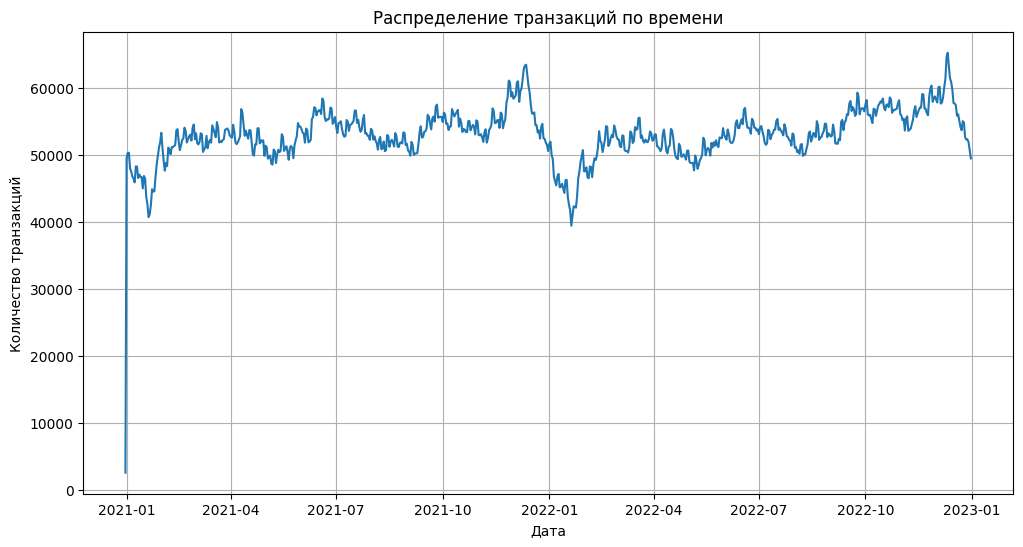

In [9]:
# Агрегирование данных по времени (например, по дням)
daily_transactions = trx.groupby(trx['event_time'].dt.date).size()

# Построение графика
plt.figure(figsize=(12, 6))
daily_transactions.plot()

plt.title('Распределение транзакций по времени')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')
plt.grid(True)

plt.show()

Видим что есть один очевидный пик и просадка до и после нового года, а также несколько восходящих и убывающих трендов в течении года.

In [10]:
print(f"Самамя ранняя транзакция {trx['event_time'].min()}")
print(f"Самамя поздняя транзакция {trx['event_time'].max()}")

Самамя ранняя транзакция 2020-12-31 21:00:02.169545
Самамя поздняя транзакция 2022-12-31 20:59:58.460193


In [11]:
print(f"Самый ранний отчетный месяц {targets['mon'].min()}")
print(f"Самый поздний отчетный месяц {targets['mon'].max()}")

Самый ранний отчетный месяц 2022-02-28
Самый поздний отчетный месяц 2023-01-31


Видим, что есть информация о транзакциях, которые больше года от отчетных событий. Нужна ли нам такая информация для обучения - вопрос дискуссионный и чтобы точно ответить на него нужно проводить дополнительные исследования и тестирование. 
Но сейчас примем за гипотезу - данные в период раньше месяца от отчетного переода нам не нужны. 

In [12]:
start_date = '2022-01-01'

trx = trx[(trx['event_time'] >= start_date)]

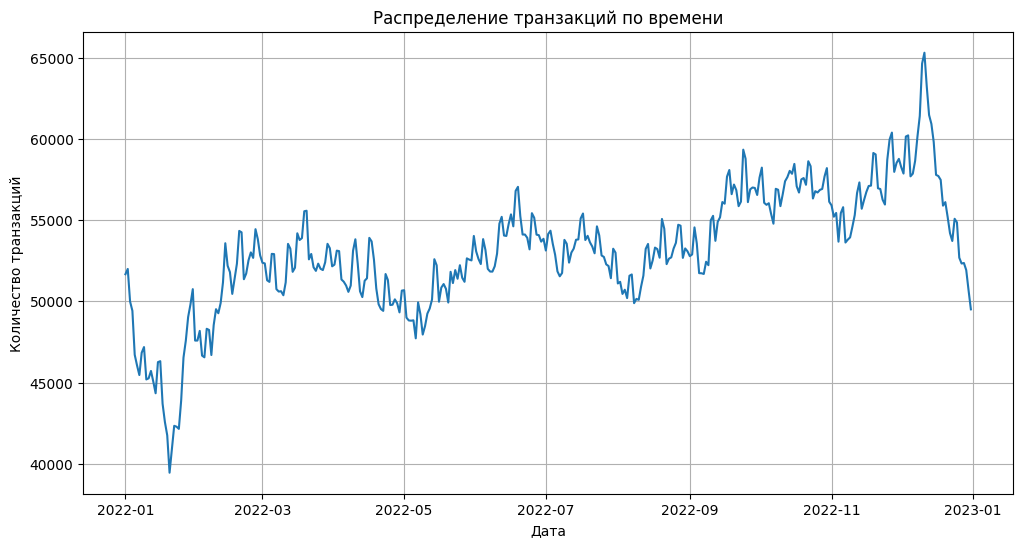

In [13]:
daily_transactions = trx.groupby(trx['event_time'].dt.date).size()

# Построение графика
plt.figure(figsize=(12, 6))
daily_transactions.plot()

plt.title('Распределение транзакций по времени')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций')
plt.grid(True)

plt.show()

Посмотрим какие есть пропуски в данных

In [14]:
print(trx.isnull().sum())

client_id             0
event_time            0
amount                0
event_type            0
event_subtype         0
currency             34
src_type11       106729
src_type12       106729
dst_type11       122087
dst_type12       122087
src_type21        18456
src_type22        18456
src_type31        37755
src_type32        37755
dtype: int64


Видим, что в "основных признаках" пропусков нет, есть только в признках, которые показывют отправляли ли мы рекламные прокламации о наших продуктах клиенту. 

Данные временных рядов последовательны и упорядочены, что означает, что пропущенные значения могут нарушить закономерности и зависимости между наблюдениями.

->

В отличие от других типов данных, вы не можете просто переупорядочить или удалить данные временных рядов, не потеряв потенциально важную временную информацию.

#### Существуют следующие способы работы с потерянными данными:

1. Метод прямого заполнения (распространение последнего наблюдения): замените значения NaN последним доступным не пропущенным значением. Использование: подходит, когда предполагается, что пропущенные значения совпадают с предыдущими записанными значениями.

```df['column_name'].fillna(method='ffill', inplace=True)```

2. Метод обратного заполнения (распространение следующего наблюдения): замените значения NaN следующим доступным не пропущенным значением. Использование: используется, когда предполагается, что пропущенные значения совпадают с последующими записанными значениями.

```df['column_name'].fillna(method='bfill', inplace=True)```

3. Метод интерполяции включает оценку пропущенных значений на основе близлежащих точек данных. Распространенные методы включают линейную, полиномиальную и сплайновую интерполяцию. Полезно, когда ожидается, что данные будут иметь плавный тренд между пропущенными точками.

```df['column_name'].interpolate(method='linear', inplace=True) # Линейная интерполяция```

```df['column_name'].interpolate(method='time', inplace=True) # Интерполяция на основе времени```

4. Среднее, медианное или модовое подстановочное значение
Замените значения NaN средним, медианным или модовым значением всего ряда или скользящего окна. Лучше всего подходит для данных с низкой дисперсией и без выраженных тенденций или сезонности.

```df['column_name'].fillna(df['column_name'].mean(), inplace=True) # Среднее подстановочное значение```

```df['column_name'].fillna(df['column_name'].median(), inplace=True) # Медианное подстановочное значение```

5. Использование скользящего среднего
Замена значений NaN средним значением соседних значений за фиксированный интервал. Эффективно для сглаживания краткосрочных колебаний и выделения долгосрочных тенденций.

```df['column_name'].fillna(df['column_name'].rolling(window=3, min_periods=1).mean(), inplace=True)```

6. Импутация на основе модели (KNN, регрессия, ARIMA)
Используются статистические или модели машинного обучения для прогнозирования пропущенных значений на основе других доступных данных. Можно использовать такие модели, как K-ближайшие соседи (KNN), регрессия или даже модели временных рядов, такие как ARIMA. Подходит для сложных наборов данных, где связи между переменными могут помочь прогнозировать пропущенные значения.

7. Удаление пропущенных значений¶
Просто удалите строки или столбцы с пропущенными значениями. Подходит только в том случае, если пропущенные данные минимальны и не оказывают существенного влияния на набор данных.

```df.dropna(inplace=True)```

Посмотрим какие есть еще данные

In [15]:
# Какие есть валюты
trx['currency'].value_counts()

currency
11.000    19364230
3.000         5442
15.000        4480
4.000         1948
17.000         159
10.000         149
8.000          133
1.000           58
6.000           19
5.000            5
16.000           4
Name: count, dtype: int64

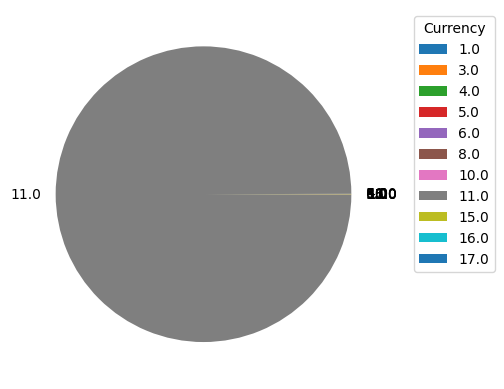

In [16]:
trx.groupby('currency').size().plot(kind='pie')
plt.legend(title='Currency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Видим, что 99.9% принадлежат одной валюте. Можем убрать данные транзакции(так и добавить дополнительные признаки, к примеру, проводили операции в двух и более валютах и тд)

In [17]:
trx = trx[trx['currency']==11]

Посмотрим на статистику транзакций

In [18]:
# Среднее и медиана транзакций
print(f'Средняя сумма транзакции: {trx["amount"].mean()}')
print(f'Медианная сумма транзакции: {trx["amount"].median()}')

Средняя сумма транзакции: 769514.25
Медианная сумма транзакции: 18567.369140625


In [19]:
# Количество транзакций на 1 человека
print(f"Среднее количество транзакции на 1 клиента: {round(trx.groupby('client_id').size().mean(), 2)}")
print(f'Медианное количество транзакции на 1 клиента: {trx.groupby("client_id").size().median()}')

Среднее количество транзакции на 1 клиента: 197.84
Медианное количество транзакции на 1 клиента: 86.0


In [20]:
# Мода event_type
print(f"Самый популярный эвент: {trx['event_type'].mode()[0]}")

Самый популярный эвент: 1


Оба датасета(транзакции и таргеты) имеют одинаковое поле "client_id" - значит по нему и будем объединять.

In [21]:
print(f"Количество уникальных клиентов в транзакциях: {len(trx['client_id'].unique())}")
print(f"Количество уникальных клиентов в датафрейме с целевыми переменными: {len(targets['client_id'].unique())}")
print(f"Количество уникальных клиентов, которые есть в обоих датафреймах: {len(set(trx['client_id']).intersection(set(targets['client_id'])))}")

Количество уникальных клиентов в транзакциях: 97880
Количество уникальных клиентов в датафрейме с целевыми переменными: 100224
Количество уникальных клиентов, которые есть в обоих датафреймах: 97880


Значит у нас 97343 клиентов, которые мы будем использовать в обучении. Это достаточно большое количество данных и мы можем использовать 150-200 признаков(как те, что уже есть в датафрейме так и новые, которые мы создадим).

Взглянем на датасет с целевыми перемеными

In [22]:
targets.describe()

,target_1,target_2,target_3,target_4,trans_count,diff_trans_date
count,1202688.000,1202688.000,1202688.000,1202688.000,1202688.000,1081902.000
mean,0.004,0.000,0.004,0.003,96.086,19.197
std,0.067,0.022,0.061,0.050,146.493,44.623
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,6.000,0.000
50%,0.000,0.000,0.000,0.000,33.000,3.000
75%,0.000,0.000,0.000,0.000,121.000,14.000
max,1.000,1.000,1.000,1.000,1000.000,364.000


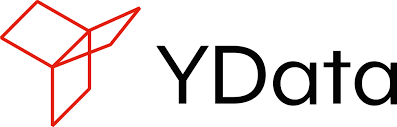

Помимо использования интуиции и здравого смысла можно воспользоваться готовыми библиотеками, к примеру [ydata-profiling](https://github.com/ydataai/ydata-profiling).


In [23]:
profile = ProfileReport(trx, title="Pandas Profiling Report")

In [24]:
# Раскомментируйте чтобы запустить
# profile
# profile.to_file("report.html")

Анализ датафрейма займет достаточно продолжительное время ~30 минут, но в результате мы получим подробный отчет

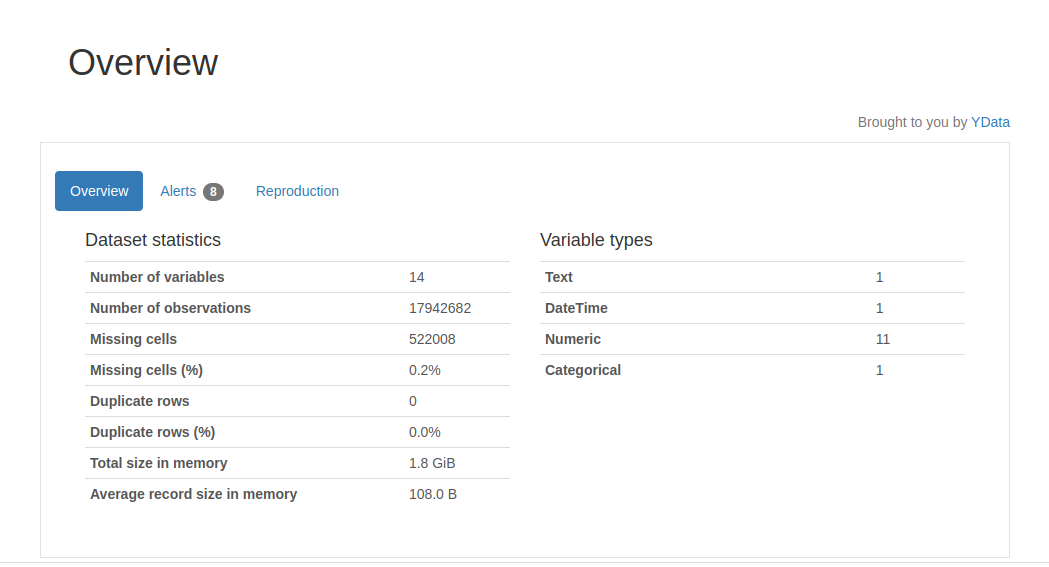

# III. Классические методы по работе с последовательностями
## 1. Создание признаков на основе последовательностей событий

Мы уже постепенно проиближаемся к обучению моделей. Но для начала необходимо создать дополнительные признаки на которых модели будет обучаться.

Давайте сгруппируем транзакции по клиенту и месяцу, сделаем сумму всех транзакций за месяц и сохраним валюту.

In [25]:
# Создание колонки с годом и месяцем
trx['year_month'] = trx['event_time'].dt.to_period('M')

# Группировка по client_id и месяцу
grouped_trx = trx.groupby(['client_id', 'year_month']).agg({
    'amount': 'sum', 
    'currency': 'first'
}).reset_index()

In [26]:
print(grouped_trx.shape)
grouped_trx.head(2)

(925679, 4)


,client_id,year_month,amount,currency
0,000032cc38caee45fe031778bcf6af05aa2aabe476acb8...,2022-01,181.290,11.000
1,000032cc38caee45fe031778bcf6af05aa2aabe476acb8...,2022-02,100614.750,11.000


Сейчас мы получили "заготовку", которую будем расширять различными признаками

Для удобства можно написать функцию, которая будет добавлять в новый датафрейм признаки. 

In [27]:
def add_features(grouped_df, new_features):
    # Создаем новые колонки
    # Объединяем два датафрейма по колонкам 'client_id' и 'year_month'
    additional_df = pd.merge(grouped_df, new_features, on=['client_id', 'year_month'], how='left')
    
    return additional_df

#### 1. Давайте добавим среднее, медианное, минимальное и максимальные значение транзакций по месяцам 

In [28]:
grouped_trx = add_features(grouped_trx, trx.groupby(['client_id', 'year_month']).agg(
    mean_amount=('amount', 'mean'),
    median_amount=('amount', 'median'),
    min_amount = ('amount', 'min'),
    max_amount = ('amount', 'max')
).reset_index())

In [29]:
print(grouped_trx.shape)
grouped_trx.head(2)

(925679, 8)


,client_id,year_month,amount,currency,mean_amount,median_amount,min_amount,max_amount
0,000032cc38caee45fe031778bcf6af05aa2aabe476acb8...,2022-01,181.290,11.000,181.290,181.290,181.290,181.290
1,000032cc38caee45fe031778bcf6af05aa2aabe476acb8...,2022-02,100614.750,11.000,12576.844,4638.669,139.210,71804.797


#### 2. Добавим количество транзакций за месяц

In [30]:
grouped_trx = add_features(grouped_trx, trx.groupby(['client_id', 'year_month']).size().reset_index(name='transaction_count')
.reset_index())

In [31]:
print(grouped_trx.shape)
grouped_trx.head(2)

(925679, 10)


,client_id,year_month,amount,currency,mean_amount,median_amount,min_amount,max_amount,index,transaction_count
0,000032cc38caee45fe031778bcf6af05aa2aabe476acb8...,2022-01,181.290,11.000,181.290,181.290,181.290,181.290,0,1
1,000032cc38caee45fe031778bcf6af05aa2aabe476acb8...,2022-02,100614.750,11.000,12576.844,4638.669,139.210,71804.797,1,8


#### 3. Добавим самая частый эвент

In [32]:
grouped_trx = add_features(grouped_trx, trx.groupby(['client_id', 'year_month'])['event_type'].agg(lambda x: x.mode()[0]).reset_index())

In [33]:
print(grouped_trx.shape)
grouped_trx.head(2)

(925679, 11)


,client_id,year_month,amount,currency,mean_amount,median_amount,min_amount,max_amount,index,transaction_count,event_type
0,000032cc38caee45fe031778bcf6af05aa2aabe476acb8...,2022-01,181.290,11.000,181.290,181.290,181.290,181.290,0,1,18
1,000032cc38caee45fe031778bcf6af05aa2aabe476acb8...,2022-02,100614.750,11.000,12576.844,4638.669,139.210,71804.797,1,8,40


#### 4. Средняя сумма транзакций за последние 3 месяца
Это называется скользящее среднее (moving average).


```Cтатистический метод, который используется для сглаживания временных рядов путем вычисления среднего значения данных за определённый период времени. Оно рассчитывается как среднее значение нескольких последовательных точек данных (наблюдений) в скользящем окне определенной длины. По мере движения по ряду данных окно сдвигается, и вычисляется новое среднее.```

![Moving Average.gif](<attachment:Moving Average.gif>)
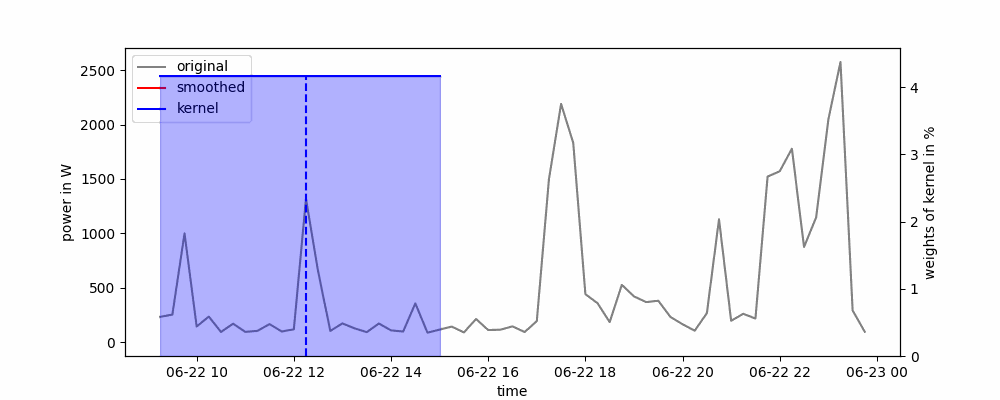

In [34]:
grouped_trx['rolling_mean_3_months'] = (
    grouped_trx.groupby('client_id')['amount'] # Шаг 1: Группировка по клиенту
    .rolling(window=3, min_periods=1) # Шаг 2: Применение скользящего среднего с окном в 3 месяца
    .mean() # Шаг 3: Вычисление среднего для каждого окна
    .reset_index(0, drop=True) # Шаг 4: Сброс индексов, чтобы вернуть результат в исходный датафрейм
)

Параметр min_periods=1 указывает, что для расчета среднего значения достаточно хотя бы одного значения. Это важно для первых месяцев, когда нет полных данных для 3 месяцев.

#### 5. Лаговые признаки
Это новые признаки, которые создаются на основе временных рядов данных. Они позволяют моделям учитывать предыдущие значения для прогнозирования текущих значений. Например, можно использовать значения из предыдущих периодов для прогнозирования будущих.
Для примера мы возьмем значение суммы транзакций и количество транзакций за предыдущий месяц.


In [35]:
# Создаем лаговые признаки для 'amount' и 'transaction_count'
grouped_trx['amount_lag_1'] = grouped_trx.groupby('client_id')['amount'].shift(1)
grouped_trx['transaction_count_lag_1'] = grouped_trx.groupby('client_id')['transaction_count'].shift(1)

In [36]:
grouped_trx.head(2)

,client_id,year_month,amount,currency,mean_amount,median_amount,min_amount,max_amount,index,transaction_count,event_type,rolling_mean_3_months,amount_lag_1,transaction_count_lag_1
0,000032cc38caee45fe031778bcf6af05aa2aabe476acb8...,2022-01,181.290,11.000,181.290,181.290,181.290,181.290,0,1,18,181.290,NaN,NaN
1,000032cc38caee45fe031778bcf6af05aa2aabe476acb8...,2022-02,100614.750,11.000,12576.844,4638.669,139.210,71804.797,1,8,40,50398.020,181.290,1.000


Заметим, что первые месяцы имеют пропуски в лаговых значения(просто неоткуда взять данные).

И так как не все модели могу работать с пропусками (Логистическая регрессия не может, XGBoost может), то нам нужно их заполнить (можно и отбросить).

In [45]:
# Заполняем пропуски текущими значениями за этот месяц
grouped_trx['amount_lag_1'] = grouped_trx['amount_lag_1'].fillna(grouped_trx['amount'])
grouped_trx['transaction_count_lag_1'] = grouped_trx['transaction_count_lag_1'].fillna(grouped_trx['transaction_count'])

In [46]:
# Убежадаемся, что нет пустых значений
print(grouped_trx.isnull().sum())

client_id                  0
year_month                 0
amount                     0
currency                   0
mean_amount                0
median_amount              0
min_amount                 0
max_amount                 0
index                      0
transaction_count          0
event_type                 0
rolling_mean_3_months      0
amount_lag_1               0
transaction_count_lag_1    0
year_month_plus_1          0
dtype: int64


#### 6. Посмотрим на поведение клиента в течении месяц

/tmp/ipykernel_37/2761938740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_data['year_month'] = client_data['year_month'].astype(str)


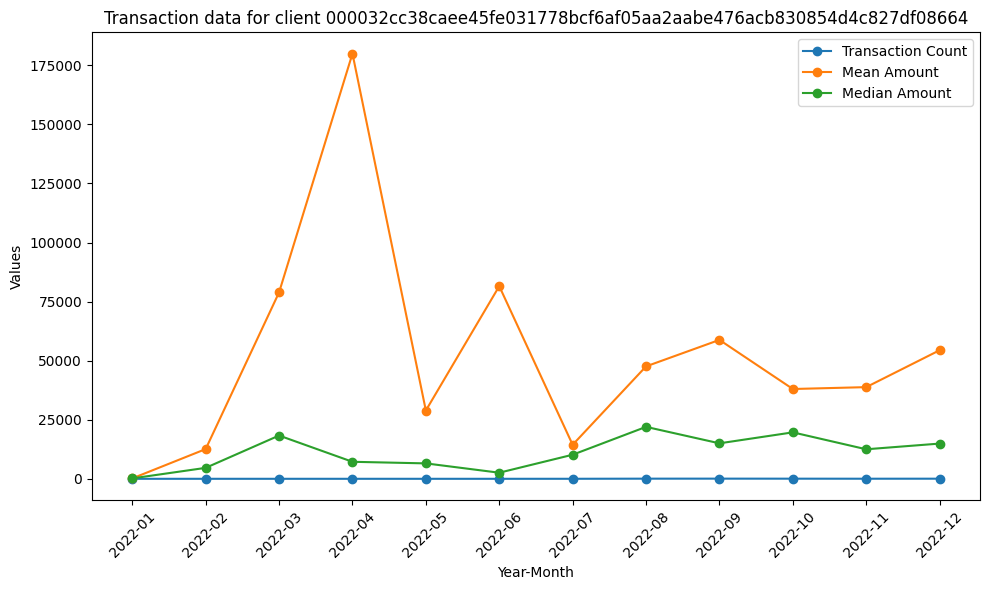

In [47]:
client_id = grouped_trx['client_id'].iloc[0]
client_data = grouped_trx[grouped_trx['client_id'] == client_id]

#client_data.loc[:, 'year_month'] = client_data['year_month'].astype(str)
client_data['year_month'] = client_data['year_month'].astype(str)

# Построение графика с обновленным форматом year_month
plt.figure(figsize=(10, 6))
plt.plot(client_data['year_month'], client_data['transaction_count'], label='Transaction Count', marker='o')
plt.plot(client_data['year_month'], client_data['mean_amount'], label='Mean Amount', marker='o')
plt.plot(client_data['year_month'], client_data['median_amount'], label='Median Amount ', marker='o')

# Настройки графика
plt.title(f'Transaction data for client {client_id}')
plt.xlabel('Year-Month')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Показать график
plt.show()

# IV. Модели для работы с временными последовательностями

Мы получили данные, давайте обучим на них две модели - Логистическую регрессию и Градиентный бустинг.

В нашей задаче, у нас 4 продукта, мы не знаем как вероятнсти, что их веберут будут коррелировать между собой, поэтому логично сделать 4 разные модели, каждая из которых будет пресказывать отдельный продукт.

Но для начала разделим датасет на test и train.
В тесте у нас будут транзакции клиента за 11 месяцев, а будем мы предсказывать 12 месяц.

In [48]:
print(f"Самый ранний месяц в транзакциях: {grouped_trx['year_month'].min()}")
print(f"Самый поздний месяц в транзакциях: {grouped_trx['year_month'].max()}")

Самый ранний месяц в транзакциях: 2022-01
Самый поздний месяц в транзакциях: 2022-12


In [49]:
print(f"Самый ранний отчетный месяц {targets['mon'].min()}")
print(f"Самый поздний отчетный месяц {targets['mon'].max()}")

Самый ранний отчетный месяц 2022-02
Самый поздний отчетный месяц 2023-01


Заметим, что по условию задачи - нам нужно предсказать купит ли клиент продукт в следующем месяце. Значит target будет со смещением на 1 месяц вперед.

т.е строке с информацией о клиенте за январь будет соответствовать значение купил ли клиент продукт в феврале.

In [50]:
def get_train_test_split(target_col_name, grouped_trx, targets):
    # Преобразуем строки дат в формат Period для удобства фильтрации
    if grouped_trx['year_month'].dtype != 'period[M]':
        grouped_trx['year_month'] = pd.to_datetime(grouped_trx['year_month']).dt.to_period('M')
    if targets['mon'].dtype != 'period[M]':
        targets['mon'] = pd.to_datetime(targets['mon']).dt.to_period('M')

    # Добавляем в trx колонку, которая будет на месяц вперед для правильного объединения
    grouped_trx['year_month_plus_1'] = grouped_trx['year_month'] + 1

    # Объединяем trx и targets по client_id и сдвинутому месяцу
    merged = pd.merge(grouped_trx, targets, left_on=['client_id', 'year_month_plus_1'], right_on=['client_id', 'mon'], how='inner')

    # Фильтруем данные для train (trx: 2022-01 до 2022-11, targets: 2022-02 до 2022-12)
    train_trx = merged[(merged['year_month'] >= pd.Period('2022-01', 'M')) & (merged['year_month'] <= pd.Period('2022-11', 'M'))]
    train_targets = merged[(merged['mon'] >= pd.Period('2022-02', 'M')) & (merged['mon'] <= pd.Period('2022-12', 'M'))]

    # Фильтруем данные для test (trx: 2022-12, targets: 2023-01)
    test_trx = merged[merged['year_month'] == pd.Period('2022-12', 'M')]
    test_targets = merged[merged['mon'] == pd.Period('2023-01', 'M')]

    # Train данные
    train = train_trx[['client_id', 'year_month', 'amount', 'currency', 'mean_amount', 
                       'median_amount', 'min_amount', 'max_amount', 'index', 'transaction_count', 
                       'event_type', 'rolling_mean_3_months', 'amount_lag_1', 'transaction_count_lag_1']].copy()
    train[target_col_name] = train_targets[target_col_name].values

    # Test данные
    test = test_trx[['client_id', 'year_month', 'amount', 'currency', 'mean_amount', 
                     'median_amount', 'min_amount', 'max_amount', 'index', 'transaction_count', 
                     'event_type', 'rolling_mean_3_months', 'amount_lag_1', 'transaction_count_lag_1']].copy()
    test[target_col_name] = test_targets[target_col_name].values

    return train, test

# Пример использования функции для получения пары train/test для target_1
train, test = get_train_test_split('target_1', grouped_trx, targets)

А теперь сделаем, то что нужно было сделать в самом начале - давайте посмотрим на дисбаланс классов.

In [51]:
print("Train target distribution:\n", train['target_1'].value_counts())
print("Test target distribution:\n", test['target_1'].value_counts())

Train target distribution:
 target_1
0    843243
1      3957
Name: count, dtype: int64
Test target distribution:
 target_1
0    78339
1      140
Name: count, dtype: int64


И видим, что у нас Оочень сильный дисбаланс. В теории и Логистическая регрессия и Градиентный бустинг (обученный на log-loss) устойчивы к дисбалансу классов. 
Но уже сейчас можно сделать предположение, что у нас будет очень высокий accuracy и низкие остальные показатели. Давайте проверим.

## 1. Логистическая регрессия


In [52]:
def run_logistic_regression(train, test, target_col_name):
    # Разделяем данные на признаки (X) и целевую переменную (y)
    X_train = train.drop(columns=[target_col_name, 'client_id', 'year_month'])
    y_train = train[target_col_name]
    
    X_test = test.drop(columns=[target_col_name, 'client_id', 'year_month'])
    y_test = test[target_col_name]

    # Создаем и обучаем модель логистической регрессии
    model = LogisticRegression(solver='liblinear', class_weight='balanced')
    model.fit(X_train, y_train)

    # Делаем предсказания на тестовых данных
    y_pred = model.predict(X_test)

    # Вычисляем метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Построение confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    # Выводим метрики
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("######################")
    print("Confusion Matrix:\n", cm)

    return model, accuracy, precision, recall, f1

# Не будем обучать на всех 4 выборках, проверим на 1
train, test = get_train_test_split('target_1', grouped_trx, targets)
model, accuracy, precision, recall, f1 = run_logistic_regression(train, test, 'target_1')

Accuracy: 0.9786
Precision: 0.0064
Recall: 0.0714
F1 Score: 0.0118
######################
Confusion Matrix:
 [[76791  1548]
 [  130    10]]


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Confussion Matrix

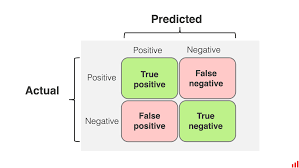

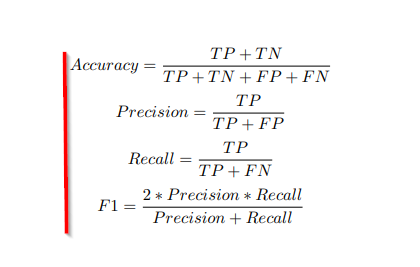

Как и предпологали.

1. Accuracy получился большим так как моделе достаточно предсказывать всегда мажорный класс чтобы никогда не ошибаться.

2. Precion, recall, f1 получились крайне низкими из-за преобладания негативного класса. Для наглядности выше показаны формулы и матрица с расчетными значениями.

Существуют различные способы борьбы с дисбалансом классов, давайте попробуем их при обучении следующей модели.


## 2. Методы градиентного бустинга 

#### 1. Построение модели

In [53]:
def balance_data(X, y):
    # Настраиваем SMOTE для oversampling
    smote = SMOTE(sampling_strategy=0.1, random_state=42)  # Увеличиваем минорный класс до 10% от мажорного

    # Применяем SMOTE для увеличения минорного класса
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Настраиваем undersampling для уменьшения мажорного класса
    under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Оставляем 50% от мажорного класса

    # Применяем undersampling
    X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)

    return X_resampled, y_resampled

def run_xgboost_with_balancing(train, test, target_col_name):
    # Разделяем данные на признаки (X) и целевую переменную (y)
    X_train = train.drop(columns=[target_col_name, 'client_id', 'year_month'])
    y_train = train[target_col_name]
    
    X_test = test.drop(columns=[target_col_name, 'client_id', 'year_month'])
    y_test = test[target_col_name]

    # Балансировка классов в тренировочном наборе данных
    X_train_balanced, y_train_balanced = balance_data(X_train, y_train)

    # Создаем и обучаем модель XGBoost
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42,
        n_estimators=500,
        learning_rate=0.01,
        max_depth=5,
        early_stopping_rounds=10
    )

    # Обучение модели
    model.fit(X_train_balanced, y_train_balanced, 
              eval_set=[(X_test, y_test)], 
              verbose=False)

    # Делаем предсказания на тестовых данных
    y_pred = model.predict(X_test)

    # Вычисляем метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Построение матрицы путаницы
    cm = confusion_matrix(y_test, y_pred)

    # Выводим метрики
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"#############")
    print(f"Confusion Matrix:\n{cm}")

    return model, accuracy, precision, recall, f1

# Пример использования:
train, test = get_train_test_split('target_1', grouped_trx, targets)
model, accuracy, precision, recall, f1 = run_xgboost_with_balancing(train, test, 'target_1')

Accuracy: 0.9561
Precision: 0.0015
Recall: 0.0357
F1 Score: 0.0029
#############
Confusion Matrix:
[[75032  3307]
 [  135     5]]


#### 2. Проверка важности фич

Можно визуализировать важности признаков (feature importance) для модели XGBoost. На графике показан вклад каждого признака в модель (чем выше F score, тем важнее признак).
Признаки упорядочены по значимости, начиная с самого важного вверху.
Для каждого признака указано, сколько раз он использовался для разделения данных во время построения модели. Чем чаще признак использовался для принятия решений, тем выше его значимость.

Пример: Признак event_type является самым важным, поскольку у него самый высокий F score (4599), тогда как mean_amount имеет наименьшее влияние на предсказания модели.

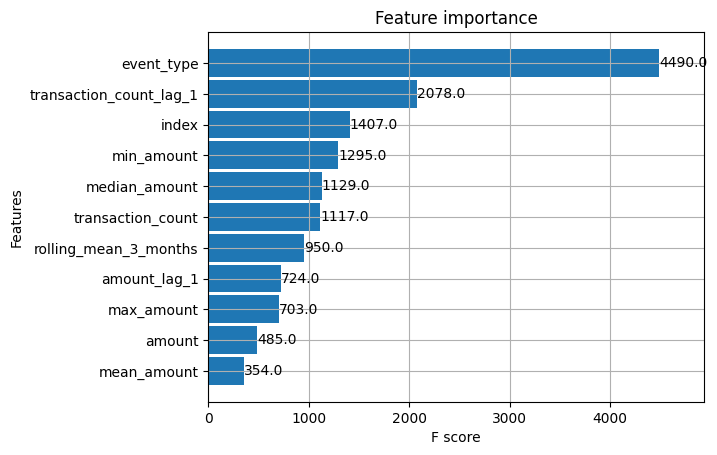

In [54]:
_ = plot_importance(model, height=0.9)

# V. Прогнозирование и интерпретиция результатов

 
5. Прогнозирование и интерпретация результатов: 
   - Визуализация предсказаний для отдельных клиентов (их транзакционные ряды и вероятность выдачи продукта). 

/tmp/ipykernel_37/3014683035.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2022-12-01 00:00:00']
Length: 1, dtype: datetime64[ns]' has dtype incompatible with period[M], please explicitly cast to a compatible dtype first.
  client_data.loc[:, 'year_month'] = client_data['year_month'].astype('datetime64[ns]')
/tmp/ipykernel_37/3014683035.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2022-01-01 00:00:00', '2022-04-01 00:00:00', '2022-08-01 00:00:00',
 '2022-09-01 00:00:00', '2022-10-01 00:00:00']
Length: 5, dtype: datetime64[ns]' has dtype incompatible with period[M], please explicitly cast to a compatible dtype first.
  client_train_data.loc[:, 'year_month'] = client_train_data['year_month'].astype('datetime64[ns]')


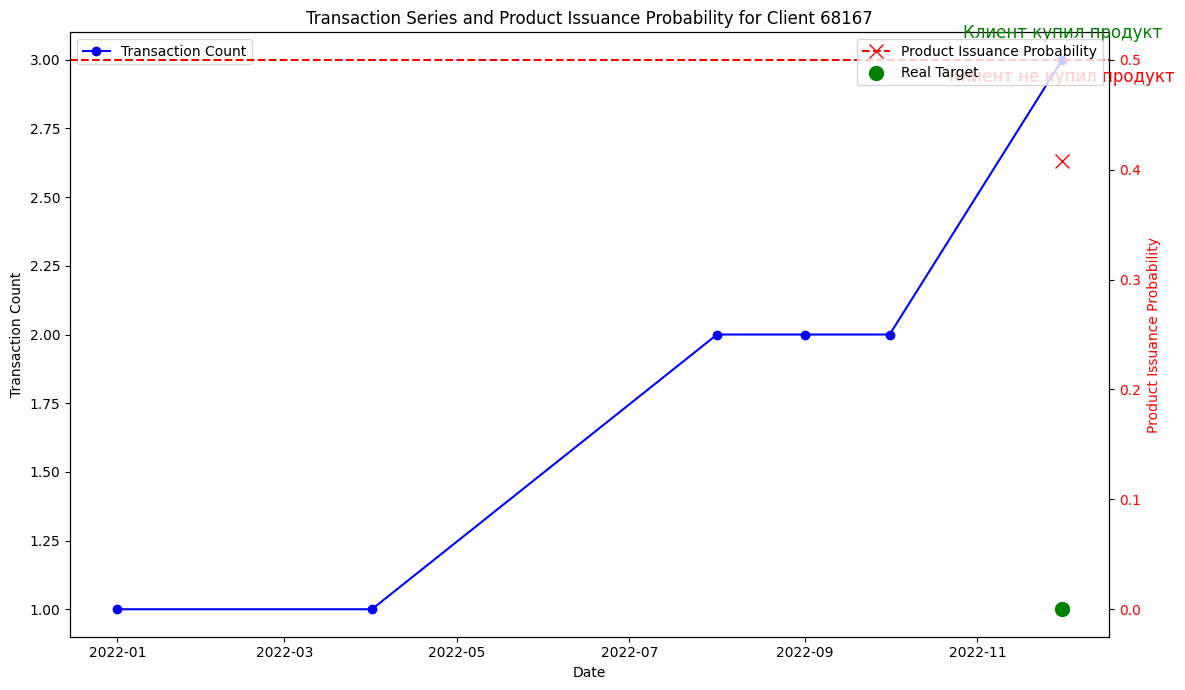

In [55]:
# Предсказания для тестовых данных
test_predictions_proba = model.predict_proba(test.drop(columns=['target_1', 'client_id', 'year_month']))[:, 1]  # вероятности для класса 1
test_predictions = model.predict(test.drop(columns=['target_1', 'client_id', 'year_month']))  # предсказания класса

# Выбор случайного клиента
client_n = rnd.randint(0, len(test) - 1)
client_id = test['client_id'].iloc[client_n]
client_data = test[test['client_id'] == client_id]
client_predictions_proba = test_predictions_proba[test['client_id'] == client_id]

# Преобразование Period в Timestamp и сортировка
client_data = client_data.copy()  # Явная копия данных для избежания предупреждений
client_data.loc[:, 'year_month'] = client_data['year_month'].astype('datetime64[ns]')
client_data = client_data.sort_values(by='year_month')

# Получение данных из train для того же клиента
client_train_data = train[train['client_id'] == client_id]

# Преобразование Period в Timestamp для train данных
client_train_data = client_train_data.copy()  # Явная копия данных для избежания предупреждений
client_train_data.loc[:, 'year_month'] = client_train_data['year_month'].astype('datetime64[ns]')
client_train_data = client_train_data.sort_values(by='year_month')

# Объединение данных
combined_data = pd.concat([
    client_data[['year_month', 'transaction_count']],
    client_train_data[['year_month', 'transaction_count']]
]).drop_duplicates().sort_values(by='year_month')

# Добавление реального target для клиента
client_real_target = client_data['target_1']

# Визуализация
if not combined_data.empty:
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Временные ряды транзакционных данных
    ax1.plot(combined_data['year_month'], combined_data['transaction_count'], label='Transaction Count', color='blue', marker='o')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Transaction Count')
    ax1.tick_params(axis='y')

    # Вторая ось Y для вероятностей
    if len(client_predictions_proba) == len(client_data):  # Проверка, что длины совпадают
        ax2 = ax1.twinx()
        marker_style = markers.MarkerStyle(marker='x')
        marker_style._transform = markers.MarkerStyle(marker='x')._transform  # Копируем преобразование

        ax2.plot(client_data['year_month'], client_predictions_proba, color='red', label='Product Issuance Probability', linestyle='--', marker=marker_style, markersize=10)
        ax2.set_ylabel('Product Issuance Probability', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

        # Добавляем пунктирную линию на уровне 0.5
        ax2.axhline(y=0.5, color='red', linestyle='--')

        # Вычисление средней точки для аннотаций
        mid_x = client_data['year_month'].iloc[len(client_data) // 2]  # Для центрирования текста
        ax2.text(mid_x, 0.52, 'Клиент купил продукт', color='green', fontsize=12, ha='center')
        ax2.text(mid_x, 0.48, 'Клиент не купил продукт', color='red', fontsize=12, ha='center')

        # Добавление реального target на график
        ax2.scatter(client_data['year_month'], client_real_target, color='green', label='Real Target', marker='o', s=100)
    else:
        print("Mismatch in length of client data and predictions!")

    # Заголовок и легенда
    plt.title(f'Transaction Series and Product Issuance Probability for Client {client_n}')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    fig.tight_layout()
    plt.show()
else:
    print(f"No data available for client {client_id}")


# VI. Заключение

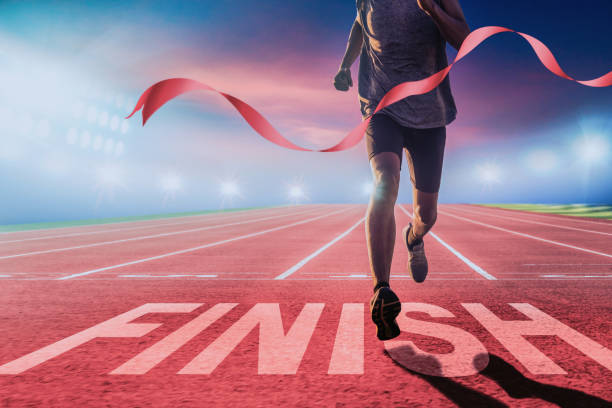

В рамках этого ноутбука был приведен пример решения задачи по временным рядам. Мы посмотрели основные этапы решения задачи:
1. Постановка задачи.
2. Исследование данных и формулировка гипотез.
3. Обработка данных и создание новых признаков на основе существующих.
4. Создание и обучение модели.
5. Интерпретация и визуализация результатов.

В рамках которых: очистили данные, добавили новые признаки в наш датасет, потренировали модели, немного поработали с проблемой дисбаланса классов, а затем визуализировали полученный результат.


Говорят, что "иные поражения учат больше чем победы". Один из главных уроков сегодня, что можно делать сложную обработку данных и тренировать модели десятки часов на gpu, но все зависит от данных. Все что мы делали лишь инструменты по работе с ними.

Для улучшения скора в данной задаче, можно посоветовать попробовать нейронные сети, такую как [LTSM](https://www.kaggle.com/discussions/questions-and-answers/270039), добавить новые фичи в текущий датасет(мы в самом начале убрали данные за целый год, можно сделать фичу - количество транзакций/сумма транзакций год назад), так же в самом [датасете](https://huggingface.co/datasets/ai-lab/MBD-mini) есть дополнительные файлы c геолокацией клиента и его диалогами - можно обогить обучающую выборку этой информацией. Экспериментируйте, пытайтесь и не бойтесь ошибаться.